### Figure
#### ANOVA for number of clusters and regions

In [1]:
cd /Users/cl1704/PycharmProjects/embedding_dimension/BWM

/Users/cl1704/PycharmProjects/embedding_dimension/BWM


In [2]:
import numpy as np
import pandas as pd
#from scipy.ndimage import gaussian_filter1d
from sklearn.decomposition import PCA
#from kneed import KneeLocator
from sklearn.manifold import Isomap
from matplotlib import gridspec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import special_ortho_group

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from datajoint_tables import *
import datajoint as dj_langdon
dj_langdon.config['database.host'] = 'datajoint-tengel.pni.princeton.edu'
dj_langdon.config['database.user'] = 'cl1704'
dj_langdon.config['database.password'] = 'wuxty2-mYdxej-kerxaq'
schema = dj_langdon.schema('langdon_ibl_manifold')
schema.spawn_missing_classes()

from sklearn.metrics import silhouette_score
import os
import scipy.optimize as opt
plt.rcParams["axes.grid"] = False
import matplotlib
matplotlib.rcParams['axes.linewidth'] = .75

[2025-05-12 10:52:45,011][INFO]: Connecting cl1704@datajoint-tengel.pni.princeton.edu:3306
[2025-05-12 10:52:45,907][INFO]: Connected cl1704@datajoint-tengel.pni.princeton.edu:3306


In [15]:
df = pd.DataFrame((Experiment_1() ).proj('eid','beryl','cosmos','n_neurons','variance','inertia','n_trials','null_param','activity_std','k','responses','p','null_inertia').fetch())
df = df[df.n_neurons>=50]

counts = df.groupby(['beryl']).size().reset_index(name='c')
acronyms = counts[(counts.c>=4)  ].beryl.values
df = df[df.beryl.isin(acronyms)]
df = df[df.cosmos!='void']
df = df[df.cosmos!='OLF']

In [16]:
from scipy.stats import f_oneway
groups = [df[df['cosmos'] == g]['k'] for g in df['cosmos'].unique()]
f_oneway(*groups)

F_onewayResult(statistic=5.662307270709675, pvalue=2.390913546019317e-06)

<Axes: >

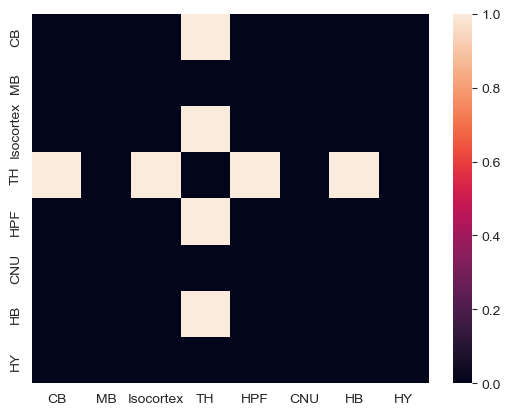

In [18]:
from scipy.stats import tukey_hsd
results =tukey_hsd(*groups)

plt.figure()
sns.heatmap((results.pvalue<.05).astype(int),xticklabels = df['cosmos'].unique(),yticklabels = df['cosmos'].unique())

In [20]:
print(results)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.617     0.611    -1.652     0.418
 (0 - 2)     -0.518     0.755    -1.509     0.472
 (0 - 3)     -1.398     0.000    -2.375    -0.422
 (0 - 4)      0.182     1.000    -0.895     1.259
 (0 - 5)     -0.561     0.835    -1.741     0.619
 (0 - 6)      0.068     1.000    -1.186     1.323
 (0 - 7)      0.046     1.000    -3.287     3.379
 (1 - 0)      0.617     0.611    -0.418     1.652
 (1 - 2)      0.099     1.000    -0.776     0.973
 (1 - 3)     -0.781     0.105    -1.640     0.077
 (1 - 4)      0.799     0.197    -0.172     1.771
 (1 - 5)      0.056     1.000    -1.028     1.140
 (1 - 6)      0.685     0.627    -0.479     1.850
 (1 - 7)      0.663     0.999    -2.637     3.963
 (2 - 0)      0.518     0.755    -0.472     1.509
 (2 - 1)     -0.099     1.000    -0.973     0.776
 (2 - 3)     -0.880     0.021    -1.685    -0.075
 (2 - 4)      0.700     0.293   

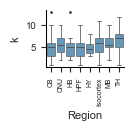

In [14]:


df = df.sort_values('cosmos')
#df = df[df.silhouette>=.1] 
fig = plt.figure(figsize=(1,.75))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])

#sns.boxplot(data = df, x = 'cosmos',y='k',legend=True,linewidth=0.5,color='tab:blue',boxprops=dict(alpha=.5))
sns.boxplot(data = df, x = 'cosmos',y='k',legend=True,linewidth=0.5,boxprops=dict(alpha=.75),fliersize=1,fill=True)
#sns.stripplot(data = df, x = 'cosmos',y='k',s=1.5,color='gray')
ax.xaxis.set_tick_params(labelsize=5,bottom=True)
ax.yaxis.set_tick_params(labelsize=7,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', labelrotation=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Region', fontsize=8)
ax.set_ylabel('k', fontsize=8)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/SIFigure_anova_a.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)
#df.to_pickle('/Users/cl1704/PycharmProjects/int-brain-lab/beryl_df.pkl')  

In [21]:
df = pd.DataFrame((Experiment_1() ).proj('eid','beryl','cosmos','n_neurons','variance','inertia','n_trials','null_param','activity_std','k','responses','p','null_inertia').fetch())
df = df[df.n_neurons>=50]

counts = df.groupby(['beryl']).size().reset_index(name='c')
acronyms = counts[(counts.c>=4)  ].beryl.values
df = df[df.beryl.isin(acronyms)]
df = df[df.cosmos!='void']
df = df[df.cosmos!='OLF']

df = df[df.cosmos=="TH"]
df = df.sort_values('beryl')
#df = df[df.silhouette>=.1] 

#df.to_pickle('/Users/cl1704/PycharmProjects/int-brain-lab/beryl_df.pkl')  

In [22]:
from scipy.stats import f_oneway
groups = [df[df['beryl'] == g]['k'] for g in df['beryl'].unique()]
f_oneway(*groups)

F_onewayResult(statistic=3.7985929354664822, pvalue=6.508398053472722e-05)

<Axes: >

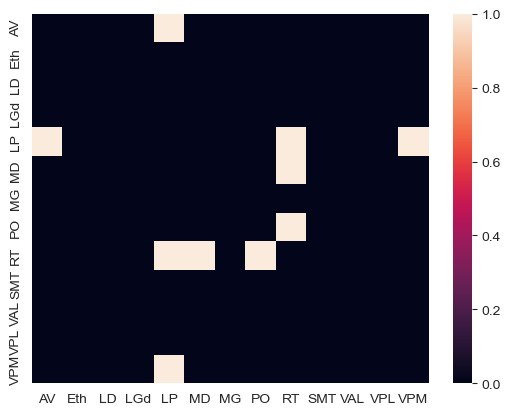

In [24]:
from scipy.stats import tukey_hsd
results =tukey_hsd(*groups)

plt.figure()
sns.heatmap((results.pvalue<.05).astype(int),xticklabels = df['beryl'].unique(),yticklabels = df['beryl'].unique())

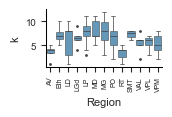

In [9]:
fig = plt.figure(figsize=(1.5,.75))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])

#sns.boxplot(data = df, x = 'cosmos',y='k',legend=True,linewidth=0.5,color='tab:blue',boxprops=dict(alpha=.5))
sns.boxplot(data = df, x = 'beryl',y='k',legend=True,linewidth=0.5,boxprops=dict(alpha=.75),fliersize=1,fill=True)
#sns.stripplot(data = df, x = 'cosmos',y='k',s=1.5,color='gray')
ax.xaxis.set_tick_params(labelsize=5,bottom=True)
ax.yaxis.set_tick_params(labelsize=7,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', labelrotation=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Region', fontsize=8)
ax.set_ylabel('k', fontsize=8)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/SIFigure_anova_a.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

In [25]:
### Isocortex

df = pd.DataFrame((Experiment_1() ).proj('eid','beryl','cosmos','n_neurons','variance','inertia','n_trials','null_param','activity_std','k','responses','p','null_inertia').fetch())
df = df[df.n_neurons>=50]

counts = df.groupby(['beryl']).size().reset_index(name='c')
acronyms = counts[(counts.c>=4)  ].beryl.values
df = df[df.beryl.isin(acronyms)]
df = df[df.cosmos!='void']
df = df[df.cosmos!='OLF']

df = df[df.cosmos=="Isocortex"]
df = df.sort_values('beryl')
#df = df[df.silhouette>=.1] 

#df.to_pickle('/Users/cl1704/PycharmProjects/int-brain-lab/beryl_df.pkl')  

In [26]:
groups = [df[df['beryl'] == g]['k'] for g in df['beryl'].unique()]
f_oneway(*groups)

F_onewayResult(statistic=1.2873718695325491, pvalue=0.22260540562996006)